# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(정답지)

## **Mission 3. 분석 모델 개발**

### [미션 이해하기]
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요? 
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


#### <b>[2일차] mission 3 목표<b>: 전처리 한 데이터를 활용하여 군집분석 하고, 데이터 탐색 기반 프로파일링을 통해 군집별 특징 정의 해보기

#### <b>[실습프로세스]<b>

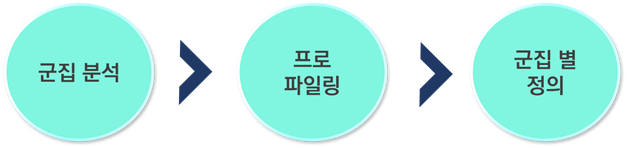

---------------------------------------------------------------------------------------------
## **(1) k-means 모델(군집 분석)**

#### **ㅇ k-means 모델이란?**
 > #### **비지도학습의 대표적인 군집분석을 위한 모델로 주어진 데이터를 K개의 클러스터로 묶는 알고리즘**
 > * K 군집의 초기 중심에서 시작해서 중심을 바꾸는 단계를 사용하여 데이터를 가장 가까운 군집으로 포함시켜 분류하는 모델
 > * 장점: 단순 알고리즘 및 빠른 연산 속도
 > * 단점: 이상치, 노이즈에 민감하고 초기 군집 수 결정 단계가 필요함

### **0. 데이터 불러오기**

In [35]:
#[문제 1] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
# 시각화 표에서 에러나는 부분 글꼴 셋팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

# 지수표현(소수점 2자리까지 나타내기)

pd.options.display.float_format = '{:.2f}'.format

In [37]:
# [문제 2] 스케일링 한 데이터 불러오기
# 1. data 변수에 'scaler_data.csv' 파일을 불러와서 할당, 인코딩은 utf-8
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('scaler_data.csv',encoding='utf-8')
data.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,0.40,0.00,0.01,0.00,0.00,0.00,0.12,0.00,0.39,0.00,0.00
1,0.00,1.00,0.05,0.00,0.00,1.00,0.12,1.00,0.03,0.00,0.00
2,0.20,0.00,0.03,0.00,0.00,1.00,0.00,1.00,0.22,0.00,0.00
3,0.80,1.00,0.13,1.00,0.00,1.00,0.29,0.33,0.78,1.00,0.00
4,0.60,1.00,0.09,0.00,1.00,1.00,0.35,0.67,0.59,0.00,0.00


### **1. 군집분석**

##### <b>군집분석을 위해 최적의 그룹 k 값을 찾아보고 최적의 군집 수를 결정해 보자

#### <b>**0) 기본 셋팅**
* yellowbrick을 임포트 해서 군집분석 해보기

In [38]:
#[같이 하기] yellowbrick이 없는 경우 pip로 설치해 주기(!pip install yellowbrick)

!pip install yellowbrick

In [39]:
# [같이 하기] k-means, yellowbrick의 KElbowVisualizer 불러오기

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#### <b>**1) 직접 하나하나 해보기**
* 몇 개의 그룹으로 군집화를 할지 k 값을 바꿔 가면서 '최적의 k 값'을 찾아보는 것을 해보자.

In [40]:
# [같이 하기] 군집화할 그룹(k) 결정하기

# 우리는 먼저 몇개의 그룹으로 군집화 할지 3~10까지 수 중에서 결정하려고 하고, 3부터 2씩 올려서 클러스터링을 해보려고 한다.
# 그러면 3개의 그룹부터 시작해 보자.


# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기
k=3

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_1 = KMeans(n_clusters=k, random_state=2023,n_init=10)

# 3. 정규화가 된(스케일링 된) 데이터에 학습

model_1.fit(data)

# 4. 클러스터링 된 결과가 각 데이터가 몇 번째 그룹에 속하는지 확인 및 저장

model_1.fit_predict(data)

array([1, 2, 1, ..., 1, 2, 1])

In [41]:
# [같이 하기] 모델이 찾은 3개의 센트로이드를 확인해보자.
# 센트로이드는 하나의 클러스터(k) 내 데이터의 중심이 되는 점이다.

model_1.cluster_centers_

array([[ 4.33653846e-01,  1.00000000e+00,  8.60181500e-02,
         9.98688811e-02,  1.38767483e-01,  1.00000000e+00,
         2.35268408e-01,  1.36800699e-01,  2.75636778e-01,
         9.61538462e-02,  9.61538462e-02],
       [ 3.94422133e-01, -1.99840144e-15,  7.06888989e-02,
         8.54529228e-02,  8.21062026e-02,  3.24408746e-01,
         2.33010473e-01,  4.35594229e-01,  4.21678996e-01,
         1.14904061e-01,  9.50468541e-02],
       [ 4.20598232e-01,  1.00000000e+00,  6.57808959e-02,
         7.98776343e-02,  1.41060503e-01,  1.00000000e+00,
         2.19418563e-01,  8.87944709e-01,  2.68163190e-01,
         9.85723997e-02,  8.15771584e-02]])

In [42]:
# [같이 하기] 3가지 성능지표를 통해서 확인해보기

# 1. inertia(이너셔) : 각 데이터와 센트로이드(중심) 사이의 평균 제곱거리로 도출한 모델 (model.inertia_로 쓴다)
# 2. score 매서드: 이너셔의 음수값을 반환( model.score(df))
# 3. %time : 모델학습에 소요되는 시간 측정

print(model_1.inertia_)
print(model_1.score(data))
%time model_1.fit(data)

8000.047484329523
-8000.047484329522
CPU times: total: 312 ms
Wall time: 66 ms


KMeans(n_clusters=3, n_init=10, random_state=2023)

<b> k=3을 같이 해봤으니 이제 여러분들이 한번 그룹수(k)를 바꿔가면서 판단을 해보실 차례입니다!
<br>2씩 늘려가면서 k값을 5,7,9개의 그룹으로 나눠서 모델 학습 시키고 성능지표를 확인해 보세요!
### **↓**

In [43]:
#[문제 3] 군집화할 그룹(k)을 5개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k1에 할당)

k1=5

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_2 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_2 = KMeans(n_clusters=k1, random_state=2023,n_init=10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model_2.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장

model_2.fit_predict(data)

#5. 학습한 결과 inertia,score,time 로 확인 해보기

print(model_2.inertia_)
print(model_2.score(data))
%time model_2.fit(data)

6242.4530087147305
-6242.4530087147305
CPU times: total: 531 ms
Wall time: 91.6 ms


KMeans(n_clusters=5, n_init=10, random_state=2023)

In [44]:
#[문제 4] 군집화할 그룹(k)을 7개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k2에 할당)

k2=7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_3 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_3 = KMeans(n_clusters=k2, random_state=2023,n_init=10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model_3.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장

model_3.fit_predict(data)

#5. 학습한 결과 inertia,score,time 로 확인 해보기

print(model_3.inertia_)
print(model_3.score(data))
%time model_3.fit(data)


5052.019230024285
-5052.019230024285
CPU times: total: 750 ms
Wall time: 129 ms


KMeans(n_clusters=7, n_init=10, random_state=2023)

In [45]:
#[문제 5] 군집화할 그룹(k)을 9개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k3에 할당)

k3=9

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_4 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_4 = KMeans(n_clusters=k3, random_state=2023,n_init=10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model_4.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장

model_4.fit_predict(data)

#5. 학습한 결과 inertia,score,time 로 확인 해보기

print(model_4.inertia_)
print(model_4.score(data))
%time model_4.fit(data)


4222.42295038579
-4222.42295038579
CPU times: total: 828 ms
Wall time: 172 ms


KMeans(n_clusters=9, n_init=10, random_state=2023)

-----------

* <b>for 문을 활용해서 그래프로도 확인을 해볼까요?

CPU times: total: 297 ms
Wall time: 48.2 ms
n_cluster:3, inertia:8000.047484329524
---------
CPU times: total: 359 ms
Wall time: 82 ms
n_cluster:4, inertia:7102.807412017433
---------
CPU times: total: 469 ms
Wall time: 82 ms
n_cluster:5, inertia:6240.371767430595
---------


CPU times: total: 719 ms
Wall time: 116 ms
n_cluster:6, inertia:5692.059975370989
---------
CPU times: total: 656 ms
Wall time: 121 ms
n_cluster:7, inertia:5194.718957588329
---------
CPU times: total: 891 ms
Wall time: 241 ms
n_cluster:8, inertia:4678.391989505909
---------
CPU times: total: 891 ms
Wall time: 158 ms
n_cluster:9, inertia:4233.560674794755
---------
CPU times: total: 1.02 s
Wall time: 166 ms
n_cluster:10, inertia:4067.449495626012
---------


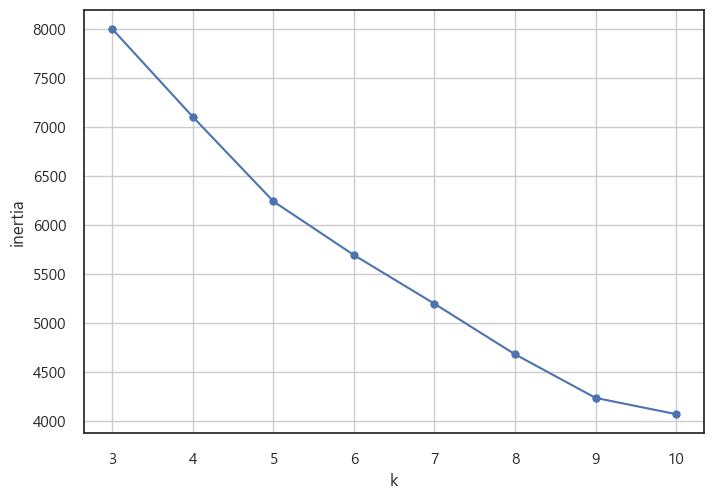

In [46]:
#[문제 6] for 문을 활용해서 3~11까지 k값을 넣어서 성능지표 확인하기

ks=range(3,11) # k값 범위 지정(range(3,11)) 후 ks 변수에 할당
inertias =[] # 이너셔 결과를 저장하기 위한 빈 리스트 생성 (변수명 inertias)

for k in ks: # for문 활용
    model = KMeans(n_clusters=k,n_init=10) # k-means 모델 만들기(그룹수 : n_clusters 파라미터 사용,n_init=10)
    %time model.fit(data) # 모델 학습 & 학습에 소요되는 시간 측정(%time 활용)
    inertias.append(model.inertia_) # 이너셔 결과를 inertias 리스트에 계속 저장(append 활용)
    print('n_cluster:{}, inertia:{}'.format(k,model.inertia_)) 
    print('---------') # n_cluster, inertia 결과 출력

plt.Figure(figsize=(15,6))
plt.plot(ks,inertias,'-o') # '-o'는 실선과 원을 같이 시각화
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid()
plt.show()

#### <b>**2) Elbow Method 활용해서 k 값 구하기**
* yellowbrick의 k-Elbow Mehod를 활용해서 최적의 k 값을 구하기(k값 결정하기 쉽게 도와주는 함수)

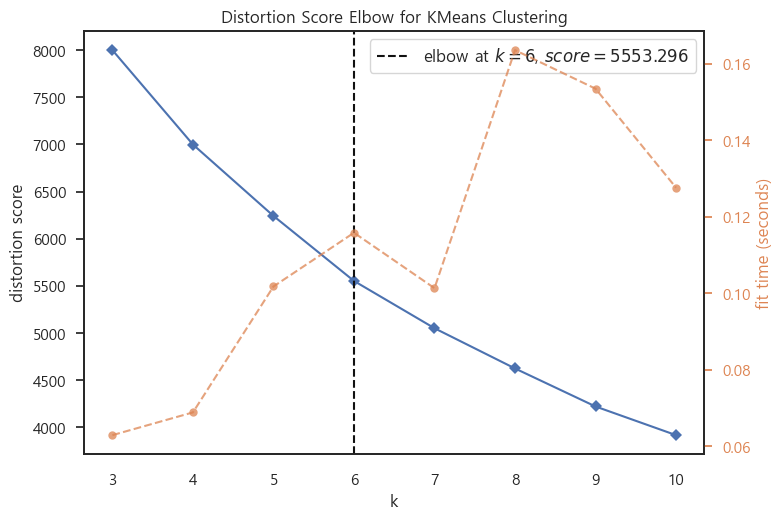

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
#[문제 7] Elbow Method를 통해 최적의 군집 수 도출을 해보자.

# 1. 모델 선언하기(random_state=2023, n_init = 10 으로 설정)(model_E로 할당)

model_E = KMeans(random_state=2023,n_init=10)

# 2. KElbowVisualizer 에 k-means 모델과 k값 넣어서 만들기(Elbow_M 에 할당)
# k값은 k=(3,11)사이의 값중에서 찾는 것으로 넣으면 된다.

Elbow_M = KElbowVisualizer(model_E,k=(3,11))

# 3. Elbow 모델 학습하기(fit)

Elbow_M.fit(data)

# 4. Elbow 모델 확인하기(show()활용)

Elbow_M.show()


#### <b>**3) 최적의 k 값으로 모델링**
* Elbow Method를 통해 나온 최적의 k값으로 모델링을 해보자.

In [48]:
# [문제 8] 원본 데이터('customers_seg.csv') 불러오기

# 1. scale이 안된 원본 data에 clust를 맵핑 시키기 위해 원본 데이터('customers_seg.csv')도 불러옵시다(encoding='cp949')
# data_o 라는 변수에 할당하기
data_o = pd.read_csv('customers_seg.csv',encoding='cp949')

# 2. 'CID'는 활용하지 않을 예정으로 index 화 시켜봅시다.(함수: set_index 활용)
data_o = data_o.set_index('CID')

# 3. 데이터 상위 5개 확인하기
data_o.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
1,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,4,계약자,고용,0,9.78,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [49]:
# [문제 9] 최적의 k 값으로 k-means 모델을 구성해보자.

#1.최적의 k 값으로 군집 수 선택 (k4에 할당)
k4=6

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_B 에 할당)
# 동일값을 위해 random_state=2023, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_B = KMeans(n_clusters=k4, random_state=2023,n_init=10)

#3. 정규화가 된(스케일링 된) 데이터에 학습

model_B.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장(kmeans_p에 할당)

kmeans_p = model_B.predict(data)

#5. 원본 데이터 프레임에 cid(index화 시킨 열) 기준으로 clust 결과 mapping 시키기(data_d1에 할당)

data_d1 = pd.DataFrame(kmeans_p,index =data_o.index)

In [51]:
# [문제 10] 데이터 프레임 clust 확인

# 1. data_d1 컬럼명을 clust로 하기
data_d1.columns=['clust']

# 2. data_d1 확인해보기
data_d1

,clust
CID,
1,2
2,4
3,5
4,0
5,3
...,...
11996,0
11997,0
11998,2


In [53]:
# [문제 11] 원 데이터(data_o) 와 클러스터링 값(data_d1) 합치기 
# 변수는 output으로 저장하고 concat 활용 해서 output 확인 해보기

output = pd.concat([data_d1,data_o],axis = 1)
output

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,,
1,2,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,4,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,5,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,0,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,3,4,계약자,고용,0,9.78,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,0,1,계약자,고용,1,25.99,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11997,0,3,피보험자,고용,0,3.44,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11998,2,3,피보험자,무직,1,9.06,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중


<b> 각 고객별로 군집(clust) 된 번호가 데이터 프레임에 생성한 것을 볼 수 있습니다! 다 왔습니다!

---------------------------------------------------------------------------------------------
## **(2) 프로파일링**

#### <b>ㅇ 프로파일링 이란? 
> ##### <b>군집의 구조와 내용을 분석하고 도메인 및 현업업무의 '추론'을 바탕으로 분석의 결과를 적용 가능하도록 하는 과정. 데이터를 통해서 군집별 특성을 파악하는 것에 목적은 두는 기법

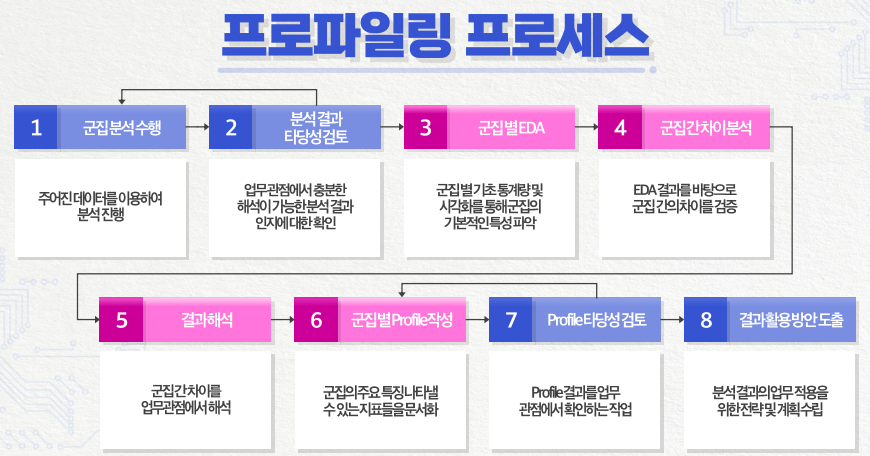

#### <font color="1E90FF"><b>★ 프로파일링을 위해 군집간의 차이를 도메인 및 업무 관점으로 해석해야한다.</font>

* 우리는 총 20개의 컬럼을 clust 별로 업무관점으로 해석하고 정리가 필요하다.
  <br>(범주형/수치형 데이터 별로도 특징과 해석방법이 조금 다르다)
  
* 도메인 지식을 총 동원 해서 각 컬럼의 clust 별 인사이트를 도출 해 보자!

### **0. 컬럼 확인해보기**

In [ ]:
#[문제 12] info를 통해서 범주형/수치형 데이터 확인해보고 어떤 컬럼들이 있었는지 확인(output)

output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int32  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

##### <b>clust 컬럼을 제외하고 그 다음 컬럼인 age 부터 차례대로 군집간의 차이를 업무관점으로 해석해 보기!

[tip]
* 범주형으로 되어있는 컬럼과 수치형으로 되어있는 컬럼이 해석하는 방법이 다르다.
* 컬럼이 어떤 컬럼인지 확인해보고 특징들을 파악해보자.

----------

### **1. AGE**

In [ ]:
# [같이 하기] 'Age' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
# crosstab의 margins='True'을 활용하면 행 합, 열 합을 추가할 수 있다.
# pro_df 변수에 할당해서 확인해보자.

pro_df = pd.crosstab([output['clust']],output['AGE'],margins=True)

# 비율로도 한번 확인 해보자.
# round 사용해서 각 값들이 전체 대비 얼마만큼 있는지 비율 확인 가능하다.
# round ((df[]/df['All'])* 100, 2) 활용 해서 df['_비울'] 으로 할당하기

pro_df['1(20대)_비율'] = np.round((pro_df[1]/ pro_df['All'])*100,2)
pro_df['2(30대)_비율'] = np.round((pro_df[2]/ pro_df['All'])*100,2)
pro_df['3(40대)_비율'] = np.round((pro_df[3]/ pro_df['All'])*100,2)
pro_df['4(50대)_비율'] = np.round((pro_df[4]/ pro_df['All'])*100,2)
pro_df['5(60대)_비율'] = np.round((pro_df[5]/ pro_df['All'])*100,2)
pro_df['6(70대)_비율'] = np.round((pro_df[6]/ pro_df['All'])*100,2)

# pro_df 값 확인
pro_df


AGE,1,2,3,4,5,6,All,1(20대)_비율,2(30대)_비율,3(40대)_비율,4(50대)_비율,5(60대)_비율,6(70대)_비율
clust,,,,,,,,,,,,,
0,709,416,673,1278,450,18,3544,20.01,11.74,18.99,36.06,12.70,0.51
1,71,80,244,275,204,29,903,7.86,8.86,27.02,30.45,22.59,3.21
2,0,508,2391,0,0,0,2899,0.00,17.52,82.48,0.00,0.00,0.00
3,199,133,346,392,85,1,1156,17.21,11.51,29.93,33.91,7.35,0.09
4,475,297,464,784,318,4,2342,20.28,12.68,19.81,33.48,13.58,0.17
5,0,104,657,395,0,0,1156,0.00,9.00,56.83,34.17,0.00,0.00
All,1454,1538,4775,3124,1057,52,12000,12.12,12.82,39.79,26.03,8.81,0.43


<b>**'age' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[같이 하기]
# 1. clust 2번: 3(40대)가 대부분이고 나머지 연령층 중 고연령층은 존재하지 않는다.
# 2. clust 5번: 3(40대),4(50대)가 대부분 차지하고(거의 90% 이상) 고연령층이 존재하지 않는다.
# 3. clust 1번: 군집 내에서 5(60대) 이상 비중이 타 군집 대비 높은 비중을 차지한다.(약 26%)

### **2. 등록(계/피)**

In [ ]:
# [문제 13] '등록(계/피)' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['등록(계/피)'],margins=True)

# 각 클러스터의 '계약자','피보험자'의 비율을 한번 체크해보자
pro_df['계약자_비율'] = np.round((pro_df['계약자']/ pro_df['All'])*100,2)
pro_df['피보험자_비율'] = np.round((pro_df['피보험자']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

등록(계/피),계약자,피보험자,All,계약자_비율,피보험자_비율
clust,,,,,
0,2797,747,3544,78.92,21.08
1,701,202,903,77.63,22.37
2,2283,616,2899,78.75,21.25
3,945,211,1156,81.75,18.25
4,1788,554,2342,76.35,23.65
5,911,245,1156,78.81,21.19
All,9425,2575,12000,78.54,21.46


<b>**'등록(계/피)' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 14]
# clust 3번 : 계약자의 비율이 비교적 다른 clust 대비 높다(80% 이상)
# 나머지 clust 들은 다 비슷하다.

### **3. 성별**

In [ ]:
# [문제 15] '성별' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['성별'],margins=True)

# 각 클러스터의 '0','1' 의 비율을 한번 체크해보자
# feature 의미 : 0(여성),1(남성)

pro_df['female'] = np.round((pro_df[0]/ pro_df['All'])*100,2)
pro_df['male'] = np.round((pro_df[1]/ pro_df['All'])*100,2)

# pro_df 확인
pro_df


성별,0,1,All,female,male
clust,,,,,
0,1867,1677,3544,52.68,47.32
1,430,473,903,47.62,52.38
2,1433,1466,2899,49.43,50.57
3,611,545,1156,52.85,47.15
4,1208,1134,2342,51.58,48.42
5,600,556,1156,51.90,48.10
All,6149,5851,12000,51.24,48.76


<b>**'성별' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 16]
# 전체적으로 보았을 때 여성의 비중이 남성의 비중보다 높으나, clust 1,2의 경우 남성의 비중이 더 높다

### **4. willingness to pay/stay(수치)**

In [ ]:
# [같이 하기] WTP의 경우 '보험 유지 기대 확률'로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','Willingness to pay/Stay']].groupby(['clust']).agg(['max','min','mean','median'])


Willingness to pay/Stay                  
                          max  min  mean median
clust                                          
0                       65.21 2.47  9.11   5.00
1                       92.50 4.08 15.95  11.81
2                       51.39 2.05  7.95   5.87
3                       56.63 2.57  8.43   6.03
4                       17.53 4.80  7.52   6.72
5                       48.05 2.34  7.97   5.74

<b>**'WTP' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [같이 하기] 
# clust 1에서 max 값이 가장 크게 나왔고 mean 값이 가장 높에 나왔다.
# 이는 가장 보험의 유지 기대 확률이 높은 군집이라고 볼 수 있다. 보험 유지는 기대 확률은 고객 타겟팅 할 떄 중요한 부분이다.

### **5. 상품 타입**

In [ ]:
# [문제 17] '상품타입' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['상품타입'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['기본_비율'] = np.round((pro_df['기본']/ pro_df['All'])*100,2)
pro_df['중급_비율'] = np.round((pro_df['중급']/ pro_df['All'])*100,2)
pro_df['고급_비율'] = np.round((pro_df['고급']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

상품타입,고급,기본,중급,All,기본_비율,중급_비율,고급_비율
clust,,,,,,,
0,335,2155,1054,3544,60.81,29.74,9.45
1,128,498,277,903,55.15,30.68,14.17
2,234,1728,937,2899,59.61,32.32,8.07
3,85,722,349,1156,62.46,30.19,7.35
4,202,1451,689,2342,61.96,29.42,8.63
5,91,724,341,1156,62.63,29.50,7.87
All,1075,7278,3647,12000,60.65,30.39,8.96


<b>**'상품타입' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 18]
# clust 1 : 고급 상품의 보유 비율이 제일 높다.
# clust 5: 기본 상품의 보유 비율이 가장 높다.

### **6. 교육수준**

In [ ]:
# [문제 19] '교육수준' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['교육수준'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자
# 앞의 탐색적 데이터 분석에서 두가지 범주로 구분을 해도 좋을 것 같다고 판단했다.
# 대졸이하(고졸이하 + 대학졸업) / 석사이상(석사+박사)으로 이분하여 비율을 한번 체크해보자

pro_df['대졸이하_비율'] = np.round(((pro_df['고졸이하']+pro_df['대학졸업'])/ pro_df['All'])*100,2)
pro_df['석사이상_비율'] = np.round(((pro_df['석사']+pro_df['박사'])/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

교육수준,고졸이하,대학졸업,박사,석사,All,대졸이하_비율,석사이상_비율
clust,,,,,,,
0,1065,2479,0,0,3544,100.00,0.00
1,295,535,22,51,903,91.92,8.08
2,973,1737,66,123,2899,93.48,6.52
3,0,0,351,805,1156,0.00,100.00
4,778,1564,0,0,2342,100.00,0.00
5,366,790,0,0,1156,100.00,0.00
All,3477,7105,439,979,12000,88.18,11.82


<b>**'교육수준' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 20]
# clust 3 : 석사 이상으로만 구성된 집단이다.
# clust 0,4,5 : 대졸 이하(고졸이하, 대학졸업) 으로만 구성된 집단이다.

### **7. 고용상태**

In [ ]:
# [문제 21] '고용상태' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['고용상태'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자
# false,고용, 무직, 휴직 별로 확인해보자. 

pro_df['false_비율'] = np.round((pro_df['FALSE']/ pro_df['All'])*100,2)
pro_df['고용_비율'] = np.round((pro_df['고용']/ pro_df['All'])*100,2)
pro_df['무직_비율'] = np.round((pro_df['무직']/ pro_df['All'])*100,2)
pro_df['휴직_비율'] = np.round((pro_df['휴직']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df


고용상태,FALSE,고용,무직,휴직,All,false_비율,고용_비율,무직_비율,휴직_비율
clust,,,,,,,,,
0,0,3544,0,0,3544,0.00,100.00,0.00,0.00
1,34,641,129,99,903,3.77,70.99,14.29,10.96
2,0,0,2899,0,2899,0.00,0.00,100.00,0.00
3,28,991,0,137,1156,2.42,85.73,0.00,11.85
4,0,2342,0,0,2342,0.00,100.00,0.00,0.00
5,298,0,0,858,1156,25.78,0.00,0.00,74.22
All,360,7518,3028,1094,12000,3.00,62.65,25.23,9.12


<b>**'고용상태' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 22] false(미확인값)을 제외하고 해석해보자

# clust 0,4: 고용 비율이 100%(모두 고용)
# clust 2 : 무직 비율이 100%
# clust 5: 휴직의 비율이 전체(false의 값을 제외했기 때문에)
# clust 3 : 고용과 휴직인 상태로만 구성(false의 값을 제외했기 때문에)

### **8. 소득(수치)**

In [ ]:
# [문제 23] '소득'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','소득']].groupby(['clust']).agg(['max','min','mean','median'])

소득                                  
             max       min        mean      median
clust                                             
0      131976900  24045000 69390455.64 68377500.00
1      132020900         0 51536600.11 48438000.00
2              0         0        0.00        0.00
3      131727200  12143000 63063841.70 60652500.00
4      131871300  24089000 69514415.03 68473000.00
5       39601100  12061000 24953785.90 25323000.00

<b>**'소득' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
# [문제 24]
# clust 2: 소득이 아예 존재 하지 않는 고객으로만 구성
# clust 5: 소득이 존재하는 군집 중에서 가장 소득이 낮은 값을 지니고 있음

### **9. 결혼여부**

In [ ]:
# [문제 25] '결혼여부' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['결혼여부'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['미혼_비율'] = np.round((pro_df['미혼']/ pro_df['All'])*100,2)
pro_df['기혼_비율'] = np.round((pro_df['기혼']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

결혼여부,기혼,미혼,All,미혼_비율,기혼_비율
clust,,,,,
0,2375,1169,3544,32.99,67.01
1,548,355,903,39.31,60.69
2,979,1920,2899,66.23,33.77
3,747,409,1156,35.38,64.62
4,1641,701,2342,29.93,70.07
5,667,489,1156,42.30,57.70
All,6957,5043,12000,42.02,57.98


<b>**'결혼여부' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 26]
# clust 2: 미혼의 비중이 가장 많은 집단이다.
# clust 4 : 기혼의 비중이 가장 많은 집단이다.

### **10. 월 납입액(수치)**

In [ ]:
# [문제 27] '월 납입액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','월 납입액']].groupby(['clust']).agg(['max','min','mean','median'])

월 납입액                   
        max  min   mean median
clust                         
0       230   60  91.52  80.00
1       350  100 193.23 210.00
2       230   60  95.17  90.00
3       230   60  91.75  80.00
4       230   60  91.48  80.00
5       230   60  91.48  80.00

<b>**'월 납입액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 28]
# Clust 1 : 월 납입액이 가장 높다
# clust 2 : 월 납입액이 두번째로 높은 군집(mean, median 값으로 확인)

### **11. VOC**

In [ ]:
# [문제 29] 'VOC' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['VOC'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자
# 우리는 VOC를 가지고 몇개가 많음을 판단하는 기준이 없다. 해서 VOC(불만 접수 사례 수)를 0과 1로 이분화 해보자.
# 0개 / 1개 이상 으로 이분하여 비율을 한번 체크해보자
# 1개 이상은 전체에서 0개 건수를 빼면 나올 것 같다!

pro_df['0개 비율'] = np.round((pro_df[0]/ pro_df['All'])*100,2)
pro_df['1개 이상_비율'] = np.round(((pro_df['All']-pro_df[0])/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

VOC,0,1,2,3,4,5,All,0개 비율,1개 이상_비율
clust,,,,,,,,,
0,2794,399,143,116,62,30,3544,78.84,21.16
1,721,103,45,25,6,3,903,79.84,20.16
2,2300,301,133,104,45,16,2899,79.34,20.66
3,920,132,37,38,26,3,1156,79.58,20.42
4,1852,251,94,94,38,13,2342,79.08,20.92
5,928,127,43,28,19,11,1156,80.28,19.72
All,9515,1313,495,405,196,76,12000,79.29,20.71


<b>**'VOC' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 30]
# Clust 5는 voc를 발생시킨 고객이 타 군집 대비 적은 것 같다. 
# 실제로 voc는 군집별 미미한 차이를 보이나.. 1건 발생으로 서비스 품질 하락 등으로 이어질 수 있기에 리스크 확인이 필요하다

### **12. 타 상품 보유 현황**

In [ ]:
# [문제 31] '타 상품 보유 현황' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['타 상품 보유 현황'],margins=True) 

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['1개_비율'] = np.round((pro_df['1']/ pro_df['All'])*100,2)
pro_df['2개_비율'] = np.round((pro_df['2']/ pro_df['All'])*100,2)
pro_df['3개_비율'] = np.round((pro_df['3']/ pro_df['All'])*100,2)
pro_df['4개 이상_비율'] = np.round((pro_df['4이상']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

타 상품 보유 현황,1,2,3,4이상,All,1개_비율,2개_비율,3개_비율,4개 이상_비율
clust,,,,,,,,,
0,2054,1490,0,0,3544,57.96,42.04,0.00,0.00
1,351,235,78,239,903,38.87,26.02,8.64,26.47
2,1011,734,353,801,2899,34.87,25.32,12.18,27.63
3,446,260,162,288,1156,38.58,22.49,14.01,24.91
4,0,0,798,1544,2342,0.00,0.00,34.07,65.93
5,421,298,154,283,1156,36.42,25.78,13.32,24.48
All,4283,3017,1545,3155,12000,35.69,25.14,12.88,26.29


<b>**'타 상품 보유 현황	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 32]
# clust 0 : 타 상품 보유가 타 군집 대비 적게 나타남(3,4개가 없고 1-2개가 대부분)
# clust 4 : 타 상품 보유가 3,4 이상 비율이 전부로 타 군집대비 많음
# clust 2: 타 상품 보유가 clust 4 다음 순위로 많음

### **13. 갱신 인센티브**

In [ ]:
# [문제 33] '갱신인센티브' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['갱신인센티브'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['설계사 독려_비율'] = np.round((pro_df['설계사독려']/ pro_df['All'])*100,2)
pro_df['없음_비율'] = np.round((pro_df['없음']/ pro_df['All'])*100,2)
pro_df['포인트_비율'] = np.round((pro_df['포인트']/ pro_df['All'])*100,2)
pro_df['할인_비율'] = np.round((pro_df['할인']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

갱신인센티브,설계사독려,없음,포인트,할인,All,설계사 독려_비율,없음_비율,포인트_비율,할인_비율
clust,,,,,,,,,
0,1396,509,559,1080,3544,39.39,14.36,15.77,30.47
1,271,100,144,388,903,30.01,11.07,15.95,42.97
2,675,237,441,1546,2899,23.28,8.18,15.21,53.33
3,416,149,209,382,1156,35.99,12.89,18.08,33.04
4,808,263,407,864,2342,34.50,11.23,17.38,36.89
5,299,80,131,646,1156,25.87,6.92,11.33,55.88
All,3865,1338,1891,4906,12000,32.21,11.15,15.76,40.88


<b>**'갱신인센티브	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 34]
# clust 2,5: 할인을 받은 비중이 가장 높음(50% 대)
# clust 0: 설계사의 독려나 인센티브 측면이 없어도 갱신이 많았던 군집

### **14. 총 지불 금액(수치)**

In [ ]:
# [문제 35] '총지불금액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

output[['clust','총지불금액']].groupby(['clust']).agg(['max','min','mean','median'])

총지불금액                            
           max    min       mean    median
clust                                     
0      1765000   1000  414592.83 399500.00
1      3573000      0 1003331.12 877000.00
2      2663000   3000  691515.70 631000.00
3      1558000   1000  373655.71 373500.00
4      1735000      0  412094.79 400000.00
5      1560000  10000  562217.99 522000.00

<b>**'총지불금액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 36]
# clust 1: 총 지불 금액이 가장 높은 군집
# clust 2: 총 지불 금액이 두번째로 높은 군집
# clust 3: 총 지불 금액의 평균이 가장 낮은 군집

### **15. 자동차**

In [ ]:
# [문제 37] '자동차' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['자동차'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['suv_비율'] = np.round((pro_df['SUV']/ pro_df['All'])*100,2)
pro_df['고급차_비율'] = np.round((pro_df['고급차']/ pro_df['All'])*100,2)
pro_df['스포츠카_비율'] = np.round((pro_df['스포츠카']/ pro_df['All'])*100,2)
pro_df['일반세단_비율'] = np.round((pro_df['일반세단']/ pro_df['All'])*100,2)
pro_df['컴팩트카_비율'] = np.round((pro_df['컴팩트카']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

자동차,SUV,고급차,스포츠카,일반세단,컴팩트카,All,suv_비율,고급차_비율,스포츠카_비율,일반세단_비율,컴팩트카_비율
clust,,,,,,,,,,,
0,731,0,0,1947,866,3544,20.63,0.00,0.00,54.94,24.44
1,0,454,449,0,0,903,0.00,50.28,49.72,0.00,0.00
2,637,0,164,1503,595,2899,21.97,0.00,5.66,51.85,20.52
3,217,0,39,623,277,1156,18.77,0.00,3.37,53.89,23.96
4,489,0,0,1359,494,2342,20.88,0.00,0.00,58.03,21.09
5,262,0,0,642,252,1156,22.66,0.00,0.00,55.54,21.80
All,2336,454,652,6074,2484,12000,19.47,3.78,5.43,50.62,20.70


<b>**'자동차' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 38]
# Clust 1: 고급차와 스포츠카 비율이 100% 인 고객 군집(가족 구성원이 사용하는 차량일 수도 있을 듯)
# clust 2 : 스포츠카를 clust 1 다음으로 많이 소유하고 있는 군집

 ### **16. 거주지 사이즈**

In [ ]:
# [문제 39] '거주지 사이즈' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['거주지사이즈'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['대_비율'] = np.round((pro_df['대']/ pro_df['All'])*100,2)
pro_df['소_비율'] = np.round((pro_df['소']/ pro_df['All'])*100,2)
pro_df['중_비율'] = np.round((pro_df['중']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df

거주지사이즈,대,소,중,All,대_비율,소_비율,중_비율
clust,,,,,,,
0,322,658,2564,3544,9.09,18.57,72.35
1,98,176,629,903,10.85,19.49,69.66
2,328,565,2006,2899,11.31,19.49,69.20
3,128,231,797,1156,11.07,19.98,68.94
4,229,470,1643,2342,9.78,20.07,70.15
5,140,232,784,1156,12.11,20.07,67.82
All,1245,2332,8423,12000,10.38,19.43,70.19


<b>**'거주지사이즈' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 40]
# clust 5: 거주지 사이즈 대가 가장 많은 집단
# clust 0,4 : 거주지 사이즈가 대보다 아래인 집단이 많은 군집


### **17. 갱신**

In [ ]:
# [문제 41] '갱신' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['갱신'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자
# 비갱신(0),갱신(1) 으로 나눠서 비율을 확인해보면 된다.

pro_df['비갱신_비율'] = np.round((pro_df[0]/ pro_df['All'])*100,2)
pro_df['갱신_비율'] = np.round((pro_df[1]/ pro_df['All'])*100,2)

# pro_df 확인
pro_df


갱신,0,1,All,비갱신_비율,갱신_비율
clust,,,,,
0,3062,482,3544,86.40,13.60
1,764,139,903,84.61,15.39
2,2624,275,2899,90.51,9.49
3,966,190,1156,83.56,16.44
4,2073,269,2342,88.51,11.49
5,795,361,1156,68.77,31.23
All,10284,1716,12000,85.70,14.30


<b>**'갱신' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 42]
# clust 5의 경우 갱신의 비율이 가장 높은 것으로 드러남
# clust 2의 경우 갱신의 비율이 가장 낮은 그룹(비갱신 비율 90%)
# clust 3의 경우 갱신의 비율이 두번째로 높은 그룹

### **18. 지역**

In [ ]:
# [문제 43] '지역' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['지역'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['도시근교_비율'] = np.round((pro_df['도시근교']/ pro_df['All'])*100,2)
pro_df['도심_비율'] = np.round((pro_df['도심']/ pro_df['All'])*100,2)
pro_df['시골_비율'] = np.round((pro_df['시골']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df


지역,도시근교,도심,시골,All,도시근교_비율,도심_비율,시골_비율
clust,,,,,,,
0,1716,877,951,3544,48.42,24.75,26.83
1,604,134,165,903,66.89,14.84,18.27
2,2641,116,142,2899,91.10,4.00,4.90
3,445,300,411,1156,38.49,25.95,35.55
4,1125,596,621,2342,48.04,25.45,26.52
5,1041,61,54,1156,90.05,5.28,4.67
All,7572,2084,2344,12000,63.10,17.37,19.53


<b>**'지역' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 44]
# clust 2 의 경우 도시 근교에 살고 있는 사람의 비중이 높다.
# clust 3의 경우 시골에 살고 있는 사람의 비중이 높다.

### **19. 온라인방문빈도**

In [ ]:
# [문제 45] '온라인방문빈도' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['온라인방문빈도'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['비방문_비율'] = np.round((pro_df['비방문']/ pro_df['All'])*100,2)
pro_df['자주방문_비율'] = np.round((pro_df['자주방문']/ pro_df['All'])*100,2)
pro_df['종종_비율'] = np.round((pro_df['종종']/ pro_df['All'])*100,2)

# pro_df 확인
pro_df


온라인방문빈도,비방문,자주방문,종종,All,비방문_비율,자주방문_비율,종종_비율
clust,,,,,,,
0,2649,747,148,3544,74.75,21.08,4.18
1,662,202,39,903,73.31,22.37,4.32
2,2165,616,118,2899,74.68,21.25,4.07
3,899,211,46,1156,77.77,18.25,3.98
4,1694,554,94,2342,72.33,23.65,4.01
5,859,245,52,1156,74.31,21.19,4.50
All,8928,2575,497,12000,74.40,21.46,4.14


<b>**'온라인방문빈도' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 46]
# 비방문, 자주방문, 종종방문의 비율들이 대부분 비슷하고 크게 차이점이 없는거 같아 보인다.
# 그 중 clust 3 의 경우 비방문과 종종 방문의 합이 다른 군집보다 놏다.
# clust 4의 경우 온라인 자주 방문의 비율이 높다. 

### **20. 판매채널**

In [ ]:
# [문제 47] '판매채널' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

pro_df = pd.crosstab([output['clust']],output['판매채널'],margins=True)

# 각 클러스터의 범주별 비율을 한번 체크해보자

pro_df['대리점_비율'] = np.round((pro_df['대리점']/ pro_df['All'])*100,2)
pro_df['인터넷_비율'] = np.round((pro_df['인터넷']/ pro_df['All'])*100,2)
pro_df['자사영업_비율'] = np.round((pro_df['자사영업']/ pro_df['All'])*100,2)
pro_df['콜센터_비율'] = np.round((pro_df['콜센터']/ pro_df['All'])*100,2)


# pro_df 확인
pro_df

판매채널,대리점,인터넷,자사영업,콜센터,All,대리점_비율,인터넷_비율,자사영업_비율,콜센터_비율
clust,,,,,,,,,
0,1361,515,1001,667,3544,38.40,14.53,28.24,18.82
1,362,138,248,155,903,40.09,15.28,27.46,17.17
2,1149,405,797,548,2899,39.63,13.97,27.49,18.90
3,427,159,341,229,1156,36.94,13.75,29.50,19.81
4,846,335,651,510,2342,36.12,14.30,27.80,21.78
5,447,188,311,210,1156,38.67,16.26,26.90,18.17
All,4592,1740,3349,2319,12000,38.27,14.50,27.91,19.32


<b>**'판매채널' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)
## ↓ 

In [ ]:
#[문제 48]
# clust 1의 경우 타 군집 보다 대리점에서 구매를 많이 했다.
# clust 5는 인터넷, clust 3은 자사영업, clust 4는 콜센터에서 많이 구매를 한 군집이다.

---------------------------------------------------------------------------------------------
## **(3) 결과 정리**

### <font color="1E90FF"><b>★ 20가지 피쳐값에 대해 군집별로 분석해 보았고 인사이트도 도출해 보았다. 한번 ppt에 정리해보자!</font>

### <b>[군집별 특성/정의 및 방안]

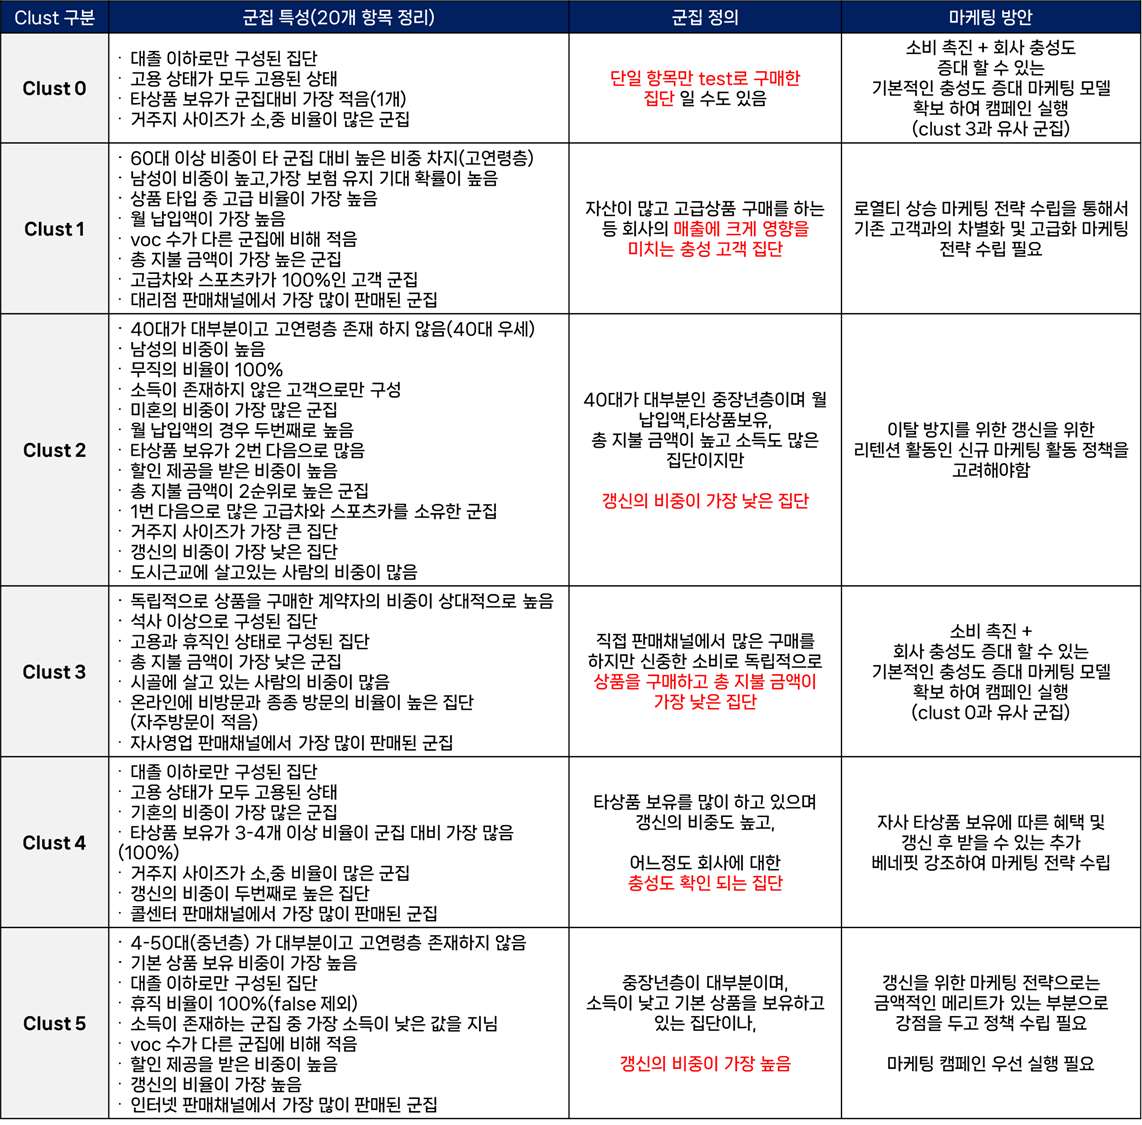

## **[Mission 3-분석모델 개발]**

* k-means 활용해 군집화 분석 모델 개발 완료
* 프로파일링 기법을 통해 각 피쳐의 군집별 특성에 대해 파악하고 정의 해봄
* 정의 한 것을 가지고 고객 군집별 마케팅 전략 수립

### <font color="1E90FF"><b>→ 여러분들은 어떻게 군집에 대해 정의를 내리고 마케팅 방안을 수립하였나요?<br><b>서로의 군집에 대해서 이야기해 보고 발표해 봅시다.<b><br>
    

# <b>Mission 3 완료!
수고하셨습니다!